In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# time: from 0 to 1000
t = np.arange(0, 1000)

# setting random seed
np.random.seed(42)

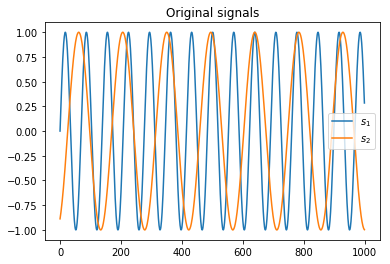

In [3]:
# define signals
s1 = np.sin(t / 11)
s2 = np.cos(t / 23 + 123)

# plotting the signals
plt.figure()
plt.title('Original signals')
plt.plot(t, s1, label = '$s_1$')
plt.plot(t, s2, label = '$s_2$')
plt.legend()
plt.show()

In [4]:
# matrix with coefficients
A = np.random.randn(2, 2)

# normalizing matrix
A = (A.T / np.linalg.norm(A, axis=1)).T

In [5]:
# calculating mixed signals
x1 = A[0,0] * s1 + A[0, 1] * s2
x2 = A[1,0] * s1 + A[1, 1] * s2

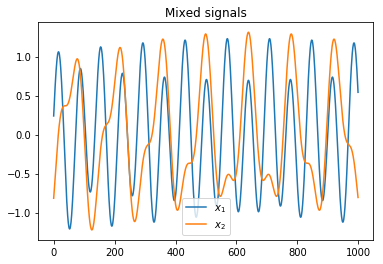

In [6]:
# plotting mixed signals
plt.figure()
plt.title('Mixed signals')
plt.plot(t, x1, label = '$x_1$')
plt.plot(t, x2, label = '$x_2$')
plt.legend()
plt.show()

In [7]:
# subtracting mean from mixed signals
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)

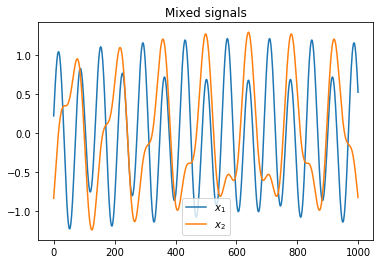

In [8]:
# plotting them again
plt.figure()
plt.title('Mixed signals')
plt.plot(t, x1, label = '$x_1$')
plt.plot(t, x2, label = '$x_2$')
plt.legend()
plt.show()

In [9]:
# whitening mixed signals

# X matrix
X = np.array([x1, x2])

# covariance matrix
Cov = X @ X.T

# eigenvectors normalized by eigenvalues
e0 = np.linalg.eig(Cov)[1][:,0] / np.sqrt(np.linalg.eig(Cov)[0][0])
e1 = np.linalg.eig(Cov)[1][:,1] / np.sqrt(np.linalg.eig(Cov)[0][1])

# calculating new components
y1 = e0 @ X
y2 = e1 @ X

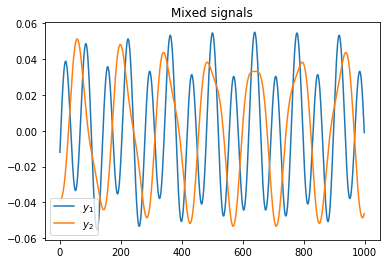

In [10]:
# plotting whitened signals
plt.figure()
plt.title('Mixed signals')
plt.plot(t, y1, label = '$y_1$')
plt.plot(t, y2, label = '$y_2$')
plt.legend()
plt.show()

In [11]:
# matrix of mixed signals
Y = np.array([y1, y2])

# mean 0
print(np.mean(Y, axis = 1))

# covariance I
print(Y @ Y.T)

[ 1.05471187e-18 -3.33066907e-19]
[[ 1.00000000e+00 -8.67361738e-17]
 [-8.67361738e-17  1.00000000e+00]]


In [12]:
# functions from https://en.wikipedia.org/wiki/FastICA
def f(x):
    return np.log(np.cosh(x))
    #return -np.exp(-x ** 2 / 2.)
def g(x):
    #return np.multiply(x, np.exp(-x ** 2 / 2.))
    return np.tanh(x)
def g_(x):
    #return -np.multiply(x ** 2, np.exp(-x ** 2 / 2.)) + np.exp(-x ** 2 / 2.)
    return 1 - np.tanh(x) ** 2

In [13]:
# setting initial w
np.random.seed(55)
w = np.random.randn(2)
w = w / np.linalg.norm(w)
print(w)

[-0.99804105 -0.06256242]


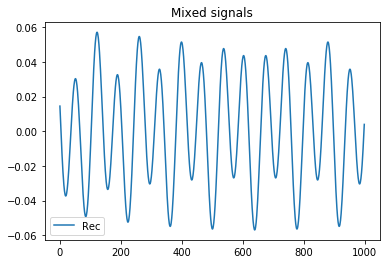

In [14]:
# plotting initial signal
plt.figure()
plt.title('Mixed signals')
plt.plot(t, w @ Y, label = 'Rec')
plt.legend()
plt.show()

In [15]:
# number of iterations (max)
N = 5000

# progress bar
bar = tqdm(total = N)

# previous value
v_prev = 0

# differences
dv = []

# values
vs = []

# iterations
for i in range(N):
    # updating w
    w = np.mean(np.multiply(Y, g(w @ Y))) - w * np.mean(g_(w @ Y))
    
    # ...and normalizing it again
    w = w / np.linalg.norm(w)
    
    # calculating new value
    v_new = np.mean(f(w @ Y))
    
    # calculating difference in value
    delta_v = v_new - v_prev
    
    # saving value for next iteration
    v_prev = v_new
    
    # stopping iterations if value does not increase
    if delta_v < 0 and v_prev != 0: break

    # updating progress bar
    bar.update()
    bar.set_postfix(v=v_new, dv = delta_v,w=w)
    
    # saving info to arrays
    dv.append(delta_v)
    vs.append(v_new)
    
# no need for progress bar anymore    
bar.close()

 14%|█▍        | 724/5000 [00:03<00:21, 197.37it/s, dv=5.93e-14, v=0.0005, w=[-0.96019693  0.27932392]]        


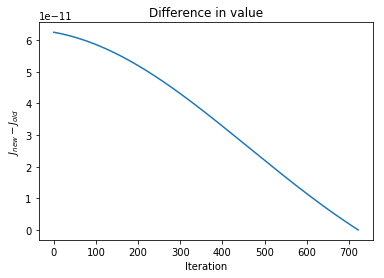

In [16]:
# plotting delta value
plt.figure()
plt.title('Difference in value')
plt.plot(dv[1:])
plt.xlabel('Iteration')
plt.ylabel('$J_{new}-J_{old}$')
plt.show()

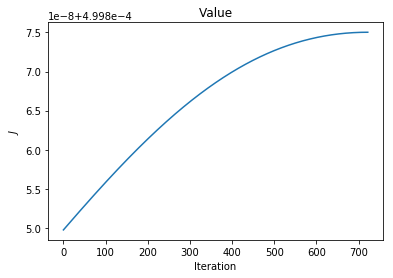

In [17]:
# plotting J -- value
plt.figure()
plt.title('Value')
plt.xlabel('Iteration')
plt.ylabel('$J$')
plt.plot(vs[1:])
plt.show()

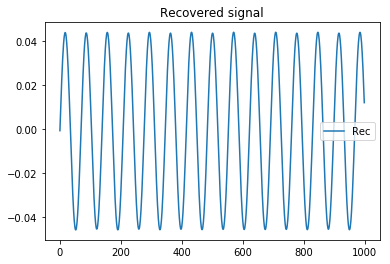

In [18]:
# plotting recovered signal
plt.figure()
plt.title('Recovered signal')
plt.plot(t, w @ Y, label = 'Rec')
plt.legend()
plt.show()

Result: recovered signal is sinusoidal whereas mixed signals and signal with initial $w$ were not.

It means that the algorithm was implemented correctly